# Computer vision pipeline

A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. The general pipeline and a specific example of a pipeline applied to facial expression recognition is pictured below.

![Face recognition pipeline](images/face_recognition_pipeline.png)

### Standardizing Data

Pre-processing images is all about standardizing input images so that you can move further along the pipeline and analyze images in the same way. In machine learning tasks, the pre-processing step is often one of the most important. For example, for a traffic sign classification task:

![Traffic sign](images/traffic_sign_classification.png)

If the images are different sizes, or even cropped differently, then this counting tactic will likely fail. So, it's important to pre-process these images so that they are standardized before they move along the pipeline. In the example below, you can see that the images are pre-processed into a standard square size.

The algorithm counts up the number of red pixels in a given image and if there are enough of them, it classifies an image as a stop sign. In this example, we are just extracting a color feature and skipping over selecting an area of interest (we are looking at the whole image). In practice, you'll often see a classification pipeline that looks like this:

![Correct Traffic classification](images/traffic_sign_classification_2.png)

# Images as Grids of Pixels

### Import resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in and display the image

Image dimensions: (427, 640, 3)


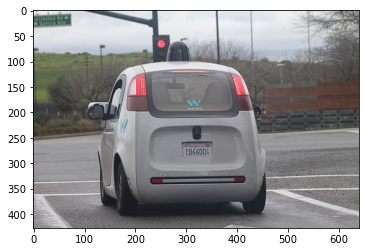

In [2]:
# Read in the image
image = cv2.imread('images/waymo_car.jpg')

# Print out the image dimensions
# image.shape will return a tuple of the number of rows, columns, and color channels (if the image has any)
print('Image dimensions:', image.shape)

# Converts image color from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_rgb)
# plt.imshow(gray_image, cmap='gray')

In [3]:
# Print specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300

# X are the columns and Y are the rows
print(gray_image[y,x])

# Prints the first 10 pixels of the first row 
print(gray_image[0][:10])

# This form of printing is the same as the one above 
# print(gray_image[0, 0:10])


160
[238 236 237 241 239 223 192 167 220 241]


In [4]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  3


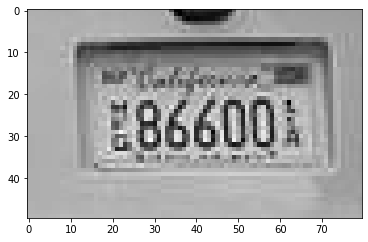

In [11]:
# Display a specific part of the image

sub_image = gray_image[50:100, 200:300] # New image matrix 
# print(sub_image)
plt.imshow(sub_image, cmap='gray')

car_plates = gray_image[250:300, 280:360]
plt.imshow(car_plates, cmap='gray')

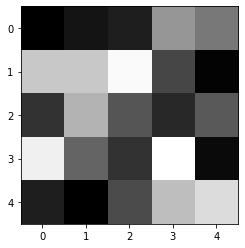

In [6]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

plt.imshow(tiny_image, cmap='gray')

[[  0.     53.125 106.25  159.375 212.5  ]
 [ 10.625  63.75  116.875 170.    223.125]
 [ 21.25   74.375 127.5   180.625 233.75 ]
 [ 31.875  85.    138.125 191.25  244.375]
 [ 42.5    95.625 148.75  201.875 255.   ]]


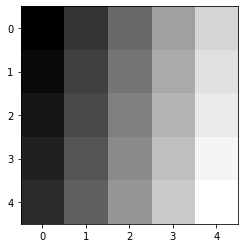

In [7]:
# Code to display a grayscale gradient
gradient_size = 5
gradient = np.zeros((gradient_size, gradient_size)) # Generates a 5x5 matrix filled with only zeros

scale = 255 / (gradient.size-1) 

# The loops are to iterate through the matrix
for x in range(gradient.shape[0]):
    for y in range(gradient.shape[1]):
        # This formula means the following: On each slot inside the matrix, from a range of 0 to 255, fill it with the correct color along that range 
        gradient[y, x] = (x * gradient_size + y) * scale 

print(gradient)

plt.imshow(gradient, cmap='gray')

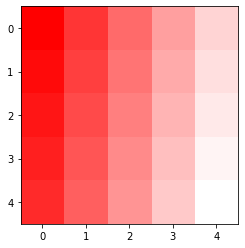

In [8]:
# Red gradient exercise

# We need a matrix with 3 matrixes inside to act as the 3 color channels to truly make up a red
gradient_size = 5

# Generates a matrix with 3 5x5 matrixes inside, filled with zeros
# uint8 = unsigned 8 bit int 
# The "unsigned" means it can go from 0 to 255, which is what we need to define a color
gradient = np.zeros((gradient_size, gradient_size, 3), dtype=np.uint8) 

scale = 255 / (gradient_size * gradient_size - 1) 

# The loops are to iterate through the matrix
for x in range(gradient.shape[0]):
    for y in range(gradient.shape[1]):
        # This formula means the following: On each slot inside the matrix, from a range of 0 to 255, fill it with the correct color along that range 
        gradient[y, x, 0] = 255
        gradient[y, x, 1:] = (x * gradient_size + y) * scale

        # This approach also works
        # gradient[y, x, 1] = (x * gradient_size + y) * scale
        # gradient[y, x, 2] = (x * gradient_size + y) * scale

# print(gradient)

plt.imshow(gradient, cmap='gray')